<a href="https://colab.research.google.com/github/aziz122596/Gentex/blob/main/%D1%82%D0%B0%D0%BD%D0%B3%D0%BB%D0%B5%D0%B3%D1%80%D0%B0%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install tanglegram -U

INFO  : Done. Use matplotlib.pyplot.show() to show plot. (tanglegram.tangle)
INFO:tanglegram.tangle:Done. Use matplotlib.pyplot.show() to show plot.


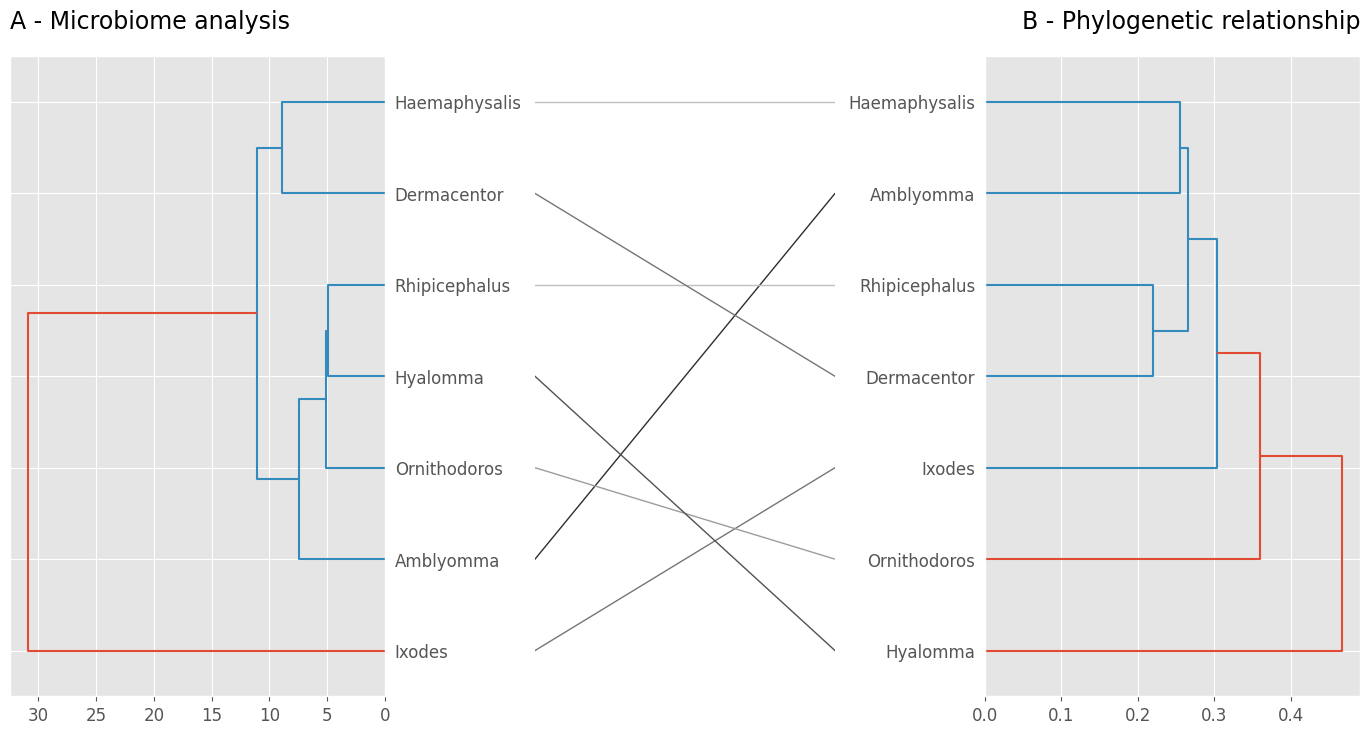

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
import tanglegram as tg

# Ваши исходные словари
tick_dict = {
    "Ixodes spp.": [9, 9, 1, 10, 5, 11, 13, 14, 3, 11, 13, 20, 24, 4, 3, 3],
    "Amblyomma": [1, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2, 4, 8, 0, 0, 0],
    "Dermacentor": [5, 0, 2, 9, 7, 7, 1, 0, 6, 3, 4, 8, 11, 0, 0, 1],
    "Haemaphysalis": [5, 5, 2, 10, 5, 8, 1, 0, 6, 2, 0, 6, 6, 1, 0, 0],
    "Hyalomma": [0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 3, 0, 1, 2],
    "Rhipicephalus": [1, 2, 1, 5, 2, 4, 0, 0, 3, 2, 1, 1, 3, 1, 0, 1],
    "Ornithodoros": [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
}

tick_dict2 = {
    "Ornithodoros brasiliensis": [0.000,  0.319,  0.358,  0.357,  0.360,  0.467,  0.357],
    "Ixodes ricinus": [0.319,  0.000,  0.303,  0.302,  0.297,  0.453,  0.301],
    "Amblyomma americanum": [0.358,  0.303,  0.000,  0.264,  0.259,  0.383,  0.255],
    "Rhipicephalus australis": [0.357,  0.302,  0.264,  0.000,  0.220,  0.434,  0.266],
    "Dermacentor everestianus": [0.360,  0.297,  0.259,  0.220,  0.000,  0.403,  0.263],
    "Hyalomma marginatum": [0.467,  0.453,  0.383,  0.434,  0.403,  0.000,  0.400],
    "Haemaphysalis longicornis": [0.357,  0.301,  0.255,  0.266,  0.263,  0.400,  0.000]
}

# Функция для исправления меток (извлечение названия рода)
def fix_label(label):
    # Разбиваем строку по пробелам и берем первое слово (название рода)
    genus = label.lower().split()[0].strip('.')
    return genus

# Исправляем ключи и метки
tick_dict_fixed = {fix_label(key): value for key, value in tick_dict.items()}
tick_dict2_fixed = {fix_label(key): value for key, value in tick_dict2.items()}

# Исходные метки
labels1 = ["Ixodes spp.",
           "Amblyomma spp.",
           "Dermacentor spp.",
           "Haemaphysalis spp.",
           "Hyalomma spp.",
           "Rhipicephalus spp.",
           "Ornithodoros spp."]

labels2 = ["Ornithodoros brasiliensis.",
           "Ixodes ricinus.",
           "Amblyomma americanum.",
           "Rhipicephalus australis.",
           "Dermacentor everestianus.",
           "Hyalomma marginatum.",
           "Haemaphysalis longicornis."]

# Применяем функцию fix_label к меткам
labels1_fixed = [fix_label(label) for label in labels1]
labels2_fixed = [fix_label(label) for label in labels2]

# Вычисляем матрицу расстояний для первого набора данных
mtx = []
for i in labels1_fixed:
    lst = []
    for j in labels1_fixed:
        dst = distance.euclidean(tick_dict_fixed[i], tick_dict_fixed[j])
        lst.append(round(dst, 2))
    mtx.append(lst)

# Создаем DataFrame для первой матрицы
mat1 = pd.DataFrame(mtx,
                    columns=labels1_fixed,
                    index=labels1_fixed)

# Создаем DataFrame для второй матрицы (используем данные из словаря)
mat2 = pd.DataFrame(tick_dict2_fixed,
                    columns=labels2_fixed,
                    index=labels2_fixed)

# Находим общие метки между двумя наборами данных
common_labels = list(set(labels1_fixed) & set(labels2_fixed))
common_labels.sort()  # Для единообразия порядка

# Фильтруем матрицы, оставляя только общие метки
mat1 = mat1.loc[common_labels, common_labels]
mat2 = mat2.loc[common_labels, common_labels]

# Проверяем, что матрицы не пустые
if mat1.empty or mat2.empty:
    print("Матрицы пустые после фильтрации. Проверьте совпадение меток.")
else:
    # Вычисляем сжатые матрицы расстояний
    condensed_mat1 = squareform(mat1.values)
    condensed_mat2 = squareform(mat2.values)

    # Вычисляем матрицы связей для кластеризации
    linkage_mat1 = linkage(condensed_mat1, method='single')
    linkage_mat2 = linkage(condensed_mat2, method='complete')

    # Получаем порядок листьев для дендрограмм
    dendro1 = dendrogram(linkage_mat1, no_plot=True)
    dendro2 = dendrogram(linkage_mat2, no_plot=True)

    idx1 = dendro1['leaves']
    idx2 = dendro2['leaves']

    # Получаем упорядоченные метки таксонов
    ordered_labels1 = [common_labels[i] for i in idx1]
    ordered_labels2 = [common_labels[i] for i in idx2]

    # Преобразуем метки к заглавным буквам
    ordered_labels1 = [label.capitalize() for label in ordered_labels1]
    ordered_labels2 = [label.capitalize() for label in ordered_labels2]

    # Построение танглограммы
    fig = tg.plot(linkage_mat1, linkage_mat2, sort=False)

    # Настройка размеров графика
    fig.set_figwidth(15)
    for ax in fig.axes:
        ax.tick_params(axis='both', which='major', labelsize=12)

    # Установка меток таксонов вместо цифр
    fig.axes[0].set_yticklabels(ordered_labels1, fontsize=12)
    fig.axes[1].set_yticklabels(ordered_labels2, fontsize=12)

    # Установка заголовков для дендрограмм
    fig.axes[1].set_title("B - Phylogenetic relationship", loc='right', fontsize=17, pad=20)
    fig.axes[0].set_title("A - Microbiome analysis", loc='left', fontsize=17, pad=20)

    # Отображение графика
    plt.show()


Положение таксона 'Hyalomma' на дендрограмме A (Анализ микробиома):
Таксон 'hyalomma' находится на позиции 4 из 7

Положение таксона 'Hyalomma' на дендрограмме B (Филогенетические отношения):
Таксон 'hyalomma' находится на позиции 1 из 7


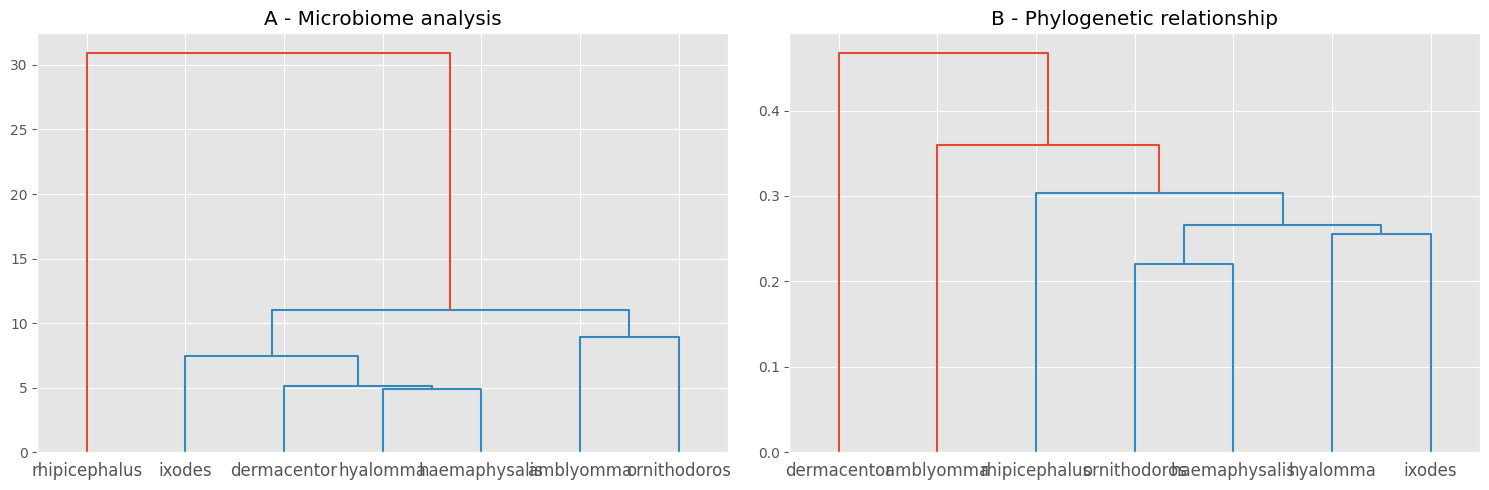

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
import tanglegram as tg

# Функция для анализа положения таксона Hyalomma
def analyze_taxon_position(taxon, linkage_matrix, labels):
    dendro = dendrogram(linkage_matrix, labels=labels, no_plot=True)
    leaf_order = dendro['leaves']
    ordered_labels = [labels[i] for i in leaf_order]
    taxon_position = ordered_labels.index(taxon)
    print(f"Таксон '{taxon}' находится на позиции {taxon_position + 1} из {len(ordered_labels)}")
    return taxon_position, ordered_labels

# Проверка позиции таксона Hyalomma на обеих дендрограммах
taxon = 'hyalomma'

# Анализ положения Hyalomma в первом дереве
print("Положение таксона 'Hyalomma' на дендрограмме A (Анализ микробиома):")
position1, ordered_labels1 = analyze_taxon_position(taxon, linkage_mat1, common_labels)

# Анализ положения Hyalomma во втором дереве
print("\nПоложение таксона 'Hyalomma' на дендрограмме B (Филогенетические отношения):")
position2, ordered_labels2 = analyze_taxon_position(taxon, linkage_mat2, common_labels)

# Визуализация положения таксона Hyalomma на обоих деревьях
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
dendrogram(linkage_mat1, labels=ordered_labels1, ax=axes[0])
axes[0].set_title("A - Microbiome analysis")
dendrogram(linkage_mat2, labels=ordered_labels2, ax=axes[1])
axes[1].set_title("B - Phylogenetic relationship")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
import tanglegram as tg

# Ваши исходные словари
tick_dict = {
    "Ixodes spp.": [9, 9, 1, 10, 5, 11, 13, 14, 3, 11, 13, 20, 24, 4, 3, 3],
    "Amblyomma": [1, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2, 4, 8, 0, 0, 0],
    "Dermacentor": [5, 0, 2, 9, 7, 7, 1, 0, 6, 3, 4, 8, 11, 0, 0, 1],
    "Haemaphysalis": [5, 5, 2, 10, 5, 8, 1, 0, 6, 2, 0, 6, 6, 1, 0, 0],
    "Hyalomma": [0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 3, 0, 1, 2],
    "Rhipicephalus": [1, 2, 1, 5, 2, 4, 0, 0, 3, 2, 1, 1, 3, 1, 0, 1],
    "Ornithodoros": [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]
}

# tick_dict2 = {
#     "Ornithodoros": [0.000,  0.324,  0.358,  0.353,  0.359,  0.421,  0.360],
#     "ixodes": [0.324,  0.000,  0.305,  0.304,  0.301,  0.363,  0.304],
#     "Amblyomma": [0.358,  0.305,  0.000,  0.267,  0.263,  0.462,  0.266],
#     "Rhipicephalus": [0.353,  0.304,  0.267,  0.000,  0.225,  0.443,  0.263],
#     "Dermacentor": [0.359,  0.301,  0.263,  0.225,  0.000,  0.405,  0.265],
#     "Hyalomma": [0.421,  0.363,  0.462,  0.443,  0.405,  0.000,  0.456],
#     "Haemaphysalis": [0.360,  0.304,  0.266,  0.263,  0.265,  0.456,  0.000]
# }

tick_dict2 = {
    "Ornithodoros brasiliensis": [0.000,  0.319,  0.358,  0.357,  0.360,  0.467,  0.357],
    "Ixodes ricinus": [0.319,  0.000,  0.303,  0.302,  0.297,  0.453,  0.301],
    "Amblyomma americanum": [0.358,  0.303,  0.000,  0.264,  0.259,  0.383,  0.255],
    "Rhipicephalus australis": [0.357,  0.302,  0.264,  0.000,  0.220,  0.434,  0.266],
    "Dermacentor everestianus": [0.360,  0.297,  0.259,  0.220,  0.000,  0.403,  0.263],
    "Hyalomma marginatum": [0.467,  0.453,  0.383,  0.434,  0.403,  0.000,  0.400],
    "Haemaphysalis longicornis": [0.357,  0.301,  0.255,  0.266,  0.263,  0.400,  0.000]
}

# Исправляем ключи и метки
def fix_label(label):
    return label.lower().replace(' spp.', '').replace('.', '').strip()

tick_dict_fixed = {fix_label(key): value for key, value in tick_dict.items()}
tick_dict2_fixed = {fix_label(key): value for key, value in tick_dict2.items()}

labels1 = ["Ixodes spp.",
           "Amblyomma spp.",
           "Dermacentor spp.",
           "Haemaphysalis spp.",
           "Hyalomma spp.",
           "Rhipicephalus spp.",
           "Ornithodoros spp."]

labels2 = ["Ornithodoros brasiliensis.",
           "Ixodes ricinus.",
           "Amblyomma americanum.",
           "Rhipicephalus australis.",
           "Dermacentor everestianus.",
           "Hyalomma marginatum.",
           "Haemaphysalis longicornis."]

labels1_fixed = [fix_label(label) for label in labels1]
labels2_fixed = [fix_label(label) for label in labels2]

# Вычисляем mtx
mtx = []
for i in labels1_fixed:
    lst = []
    for j in labels1_fixed:
        dst = distance.euclidean(tick_dict_fixed[i], tick_dict_fixed[j])
        lst.append(round(dst, 2))
    mtx.append(lst)

# # Вычисляем mtx2
# mtx2 = []
# for i in labels2_fixed:
#     lst = []
#     for j in labels2_fixed:
#         dst = distance.euclidean(tick_dict2_fixed[i], tick_dict2_fixed[j])
#         lst.append(round(dst, 2))
#     mtx2.append(lst)

# Создаем DataFrame
mat1 = pd.DataFrame(mtx,
                    columns=labels1_fixed,
                    index=labels1_fixed)

mat2 = pd.DataFrame(tick_dict2,
                    columns=labels2_fixed,
                    index=labels2_fixed)

# Находим общие метки
common_labels = list(set(labels1_fixed) & set(labels2_fixed))
common_labels.sort()  # Для единообразия порядка

# Фильтруем матрицы
mat1 = mat1.loc[common_labels, common_labels]
mat2 = mat2.loc[common_labels, common_labels]

# Вычисляем матрицы связности с учетом исправлений
condensed_mat1 = squareform(mat1.values)
condensed_mat2 = squareform(mat2.values)

linkage_mat1 = linkage(condensed_mat1, method='single')
linkage_mat2 = linkage(condensed_mat2, method='ward')

# Получаем порядок листьев
dendro1 = dendrogram(linkage_mat1, no_plot=True)
dendro2 = dendrogram(linkage_mat2, no_plot=True)

idx1 = dendro1['leaves']
idx2 = dendro2['leaves']

# ordered_labels1 = [common_labels[i] for i in idx1]
# ordered_labels2 = [common_labels[i] for i in idx2]

# Преобразуем метки к заглавным буквам
ordered_labels1 = [label.capitalize() for label in ordered_labels1]
ordered_labels2 = [label.capitalize() for label in ordered_labels2]

# Построение танглограммы
fig = tg.plot(linkage_mat1, linkage_mat2, sort=False)

# Настройка размеров графика
fig.set_figwidth(15)
for ax in fig.axes:
    ax.tick_params(axis='both', which='major', labelsize=12)

# Установка меток таксонов вместо цифр
fig.axes[0].set_yticklabels(ordered_labels1, fontsize=12)
fig.axes[1].set_yticklabels(ordered_labels2, fontsize=12)

# Установка заголовков для дендрограмм
fig.axes[1].set_title("B - Phylogenetic relationship", loc='right', fontsize=17, pad=20)
fig.axes[0].set_title("A - Microbiome analysis", loc='left', fontsize=17, pad=20)

# Отображение графика
plt.show()

# # Построение танглограммы
# fig = tg.plot(linkage_mat1, linkage_mat2, sort=False)

# # Настройка графика
# fig.set_figwidth(15)
# for ax in fig.axes:
#     ax.tick_params(axis='both', which='major', labelsize=12)

# # Установка меток
# fig.axes[0].set_xticklabels(ordered_labels1, rotation=90, fontsize=12)
# fig.axes[1].set_xticklabels(ordered_labels2, rotation=90, fontsize=12)

# fig.axes[0].set_title("A - Phylogenetic analysis", loc='left', fontsize=12, pad=20)
# fig.axes[1].set_title("B - Microbiome analysis", loc='right', fontsize=12, pad=20)

# plt.show()

ValueError: The number of observations cannot be determined on an empty distance matrix.

In [ ]:
from scipy.spatial import distance
import tanglegram as tg
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tick_dict = {
"ixodes spp.": [9, 9, 1, 10, 5, 11, 13, 14, 3, 11, 13, 20, 24, 4, 3, 3],
"amblyomma": [1, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2, 4, 8, 0, 0, 0],
"dermacentor": [5, 0, 2, 9, 7, 7, 1, 0, 6, 3, 4, 8, 11, 0, 0, 1],
"haemophysalis": [5, 5, 2, 10, 5, 8, 1, 0, 6, 2, 0, 6, 6, 1, 0, 0],
"hyalomma": [0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 3, 0, 1, 2],
"rhipicephalus": [1, 2, 1, 5, 2, 4, 0, 0, 3, 2, 1, 1, 3, 1, 0, 1],
"ornithodoros": [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]}

In [ ]:
tick_dict2 = {
    "Ornithodoros": [0.000,  0.324,  0.358,  0.353,  0.359,  0.421,  0.360],
    "ixodes": [0.324,  0.000,  0.305,  0.304,  0.301,  0.363,  0.304],
    "Amblyomma": [0.358,  0.305,  0.000,  0.267,  0.263,  0.462,  0.266],
    "Rhipicephalus": [0.353,  0.304,  0.267,  0.000,  0.225,  0.443,  0.263],
    "Dermacentor": [0.359,  0.301,  0.263,  0.225,  0.000,  0.405,  0.265],
    "Hyalomma": [0.421,  0.363,  0.462,  0.443,  0.405,  0.000,  0.456],
    "Haemaphysalis": [0.360,  0.304,  0.266,  0.263,  0.265,  0.456,  0.000]
}

In [ ]:
mtx = []
for i in tick_dict:
  lst = []
  for j in tick_dict:
    dst = distance.euclidean(tick_dict[i], tick_dict[j])
    lst.append(round(dst, 2))
  mtx.append(lst)

print(mtx)

[[0.0, 37.58, 30.9, 34.47, 41.01, 40.12, 44.83], [37.58, 0.0, 13.53, 13.86, 7.48, 8.0, 9.27], [30.9, 13.53, 0.0, 8.89, 17.18, 14.32, 20.47], [34.47, 13.86, 8.89, 0.0, 14.9, 11.05, 18.22], [41.01, 7.48, 17.18, 14.9, 0.0, 4.9, 5.1], [40.12, 8.0, 14.32, 11.05, 4.9, 0.0, 8.0], [44.83, 9.27, 20.47, 18.22, 5.1, 8.0, 0.0]]


In [ ]:
mtx2 = []
for i in tick_dict2:
  lst = []
  for j in tick_dict2:
    dst = distance.euclidean(tick_dict2[i], tick_dict2[j])
    lst.append(round(dst, 2))
  mtx2.append(lst)

print(mtx2)

[[0.0, 0.47, 0.53, 0.53, 0.54, 0.62, 0.53], [0.47, 0.0, 0.45, 0.45, 0.44, 0.59, 0.45], [0.53, 0.45, 0.0, 0.38, 0.38, 0.72, 0.38], [0.53, 0.45, 0.38, 0.0, 0.32, 0.71, 0.37], [0.54, 0.44, 0.38, 0.32, 0.0, 0.68, 0.38], [0.62, 0.59, 0.72, 0.71, 0.68, 0.0, 0.72], [0.53, 0.45, 0.38, 0.37, 0.38, 0.72, 0.0]]


In [ ]:
labels1 = ["Ixodes spp.",
"Amblyomma spp.",
"Dermacentor spp.",
"Haemaphysalis spp.",
"Hyalomma spp.",
"Rhipicephalus spp.",
"Ornithodoros spp."]

In [ ]:
labels2 = ["Ornithodoros.",
"ixodes.",
"Amblyomma.",
"Rhipicephalus.",
"Dermacentor.",
"Hyalomma.",
"Haemaphysalis."]

In [ ]:
mat1 = pd.DataFrame(mtx,
                    columns=labels1,
                    index=labels1)

mat2 = pd.DataFrame(mtx2,
                    columns=labels2,
                    index=labels2)

ValueError: Length of values (14) does not match length of index (7)

In [ ]:
plt.figure(figsize = (12,8))
fig = tg.plot(mat1, mat2, sort=False)

fig.axes[0].set_title("A - Phylogenetic analysis", loc='left', fontsize = 12, pad=20)
fig.axes[1].set_title("B - Microbiome analysis", loc='right', fontsize = 12, pad=20)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
import tanglegram as tg  # Убедитесь, что эта библиотека установлена

# Проверяем размеры матриц
print("Размер mat1:", mat1.shape)
print("Размер mat2:", mat2.shape)

# Вычисляем попарные расстояния
dist_mat1 = pdist(mat1, metric='euclidean')
dist_mat2 = pdist(mat2, metric='euclidean')

# Строим матрицы связности
linkage_mat1 = linkage(dist_mat1, method='ward')
linkage_mat2 = linkage(dist_mat2, method='ward')

# Построение танглограммы
fig = tg.plot(linkage_mat1, linkage_mat2, sort=False)

# Настройка размеров и шрифтов
fig.set_figwidth(15)
for ax in fig.axes:
    ax.tick_params(axis='both', which='major', labelsize=15)

fig.axes[0].set_title("(A) Phylogenetic relationship", loc='left', fontsize=17, pad=20)
fig.axes[1].set_title("(B) Microbiome analysis", loc='right', fontsize=17, pad=20)

plt.show()
